## Exploratory Data Analysis - Part 2

Campaigns with less than 7 contacts to clients were almost 2 times more efficient than campaign with a higher number of contacts

What could be the underlying reason?

Dataset: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Attribute Information:

Input variables:
#### bank client data:

1.  **age** (numeric)
2.  **job** : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3.  **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  **default**: has credit in default? (categorical: 'no','yes','unknown')
6.  **housing**: has housing loan? (categorical: 'no','yes','unknown')
7.  **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8.  **contact**: contact communication type (categorical: 'cellular','telephone')
9.  **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12.  **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  **previous**: number of contacts performed before this campaign and for this client (numeric)
15.  **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16.  **emp.var.rate**: employment variation rate  quarterly indicator (numeric)
17.  **cons.price.idx**: consumer price index  monthly indicator (numeric)
18.  **cons.conf.idx**: consumer confidence index  monthly indicator (numeric)
19.  **euribor3m**: euribor 3 month rate  daily indicator (numeric)
20.  **nr.employed**: number of employees  quarterly indicator (numeric)

Output variable (desired target):
21.  **y**  has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# import all the libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 

import pods
import zipfile
SEED = 123

from IPython.display import display
import random
import time

pd.options.display.max_columns = None
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep =";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
map_dict= {"no":0, "yes":1}
df["y"] = df["y"].map(map_dict)

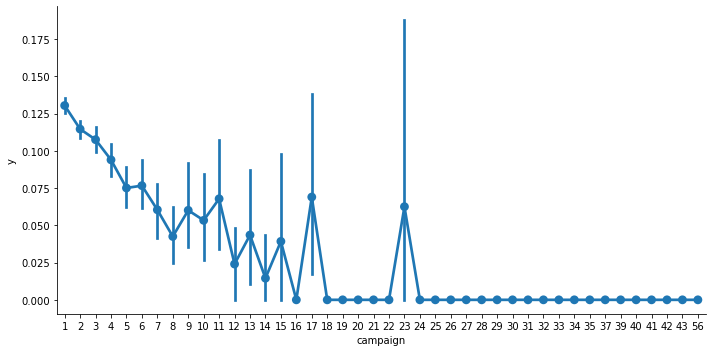

In [4]:
sns.catplot(x="campaign", y="y", data =df, kind= "point", aspect =2);

In [5]:
len(df[df["y"]==0]["campaign"].values)

36548

### Inefficient campaigns which resulted only in y=0

In [6]:
gr = df.groupby(["campaign", "y"])[["age"]].count().reset_index("y")
zero_campaigns = set(gr.index) - set(gr[gr["y"]==1].index)
print("Total number of unique campaigns /Number of contacts performed during this campaign and for this client):", df["campaign"].nunique())
print("Number of inefficient sets of contacts", len(zero_campaigns))

Total number of unique campaigns /Number of contacts performed during this campaign and for this client): 42
Number of inefficient sets of contacts 25


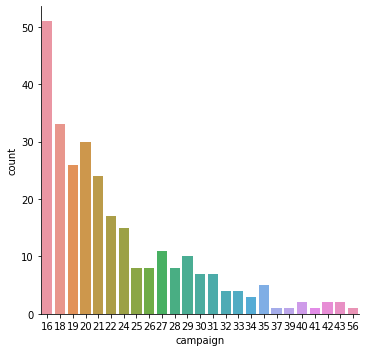

In [7]:
df2 = df.set_index("campaign").loc[zero_campaigns, :].reset_index()
sns.catplot(x="campaign", kind="count", data=df2);

In [8]:
df[df["campaign"]==20].shape

(30, 21)

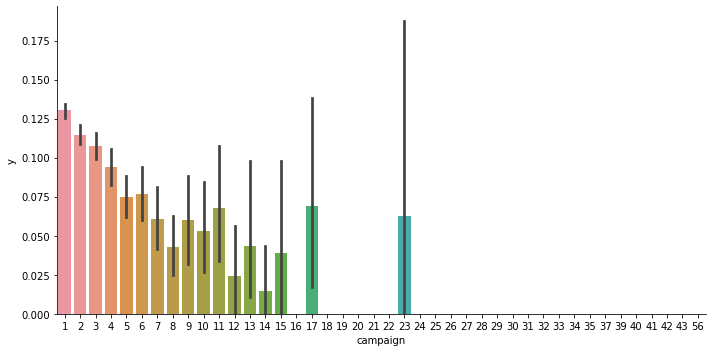

In [9]:
sns.catplot(x="campaign", y="y", data =df, kind= "bar", aspect=2);

In [10]:
df[df["campaign"]==23]["y"].value_counts()

0    15
1     1
Name: y, dtype: int64

In [11]:
df[df["campaign"]==23]["y"].mean(), df[df["campaign"]==23]["y"].std()

(0.0625, 0.25)

In [12]:
df["campaign_7"] = np.where(df["campaign"]<=7, 1, 0)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'campaign_7'],
      dtype='object')

In [13]:
columns_to_show = list(set(df.columns) -set(["y", "campaign_7", "campaign"]))

In [14]:
df.corr()["campaign_7"]

age              -0.002869
duration          0.064966
campaign         -0.755382
pdays            -0.036425
previous          0.058759
emp.var.rate     -0.115566
cons.price.idx   -0.095750
cons.conf.idx     0.000583
euribor3m        -0.105781
nr.employed      -0.111337
y                 0.048069
campaign_7        1.000000
Name: campaign_7, dtype: float64

In [15]:
cont_variables = [col for col in df.columns if df[col].dtype!="object"]

df.groupby("campaign_7")[cont_variables].mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign_7
campaign_7,,,,,,,,,,,,
0,40.164885,178.959482,12.421497,994.537423,0.036016,0.936860,93.836674,-40.515307,4.485324,5204.919021,0.041080,0.0
1,40.017711,261.861714,2.123290,961.029814,0.179138,0.043336,93.563896,-40.502027,3.582332,5165.327802,0.115881,1.0


In [16]:
df["campaign_7"].value_counts()

1    39411
0     1777
Name: campaign_7, dtype: int64

In [17]:
# The highest difference can be seen for:
col_to_check = ["duration", "previous", "emp.var.rate", "euribor3m"]

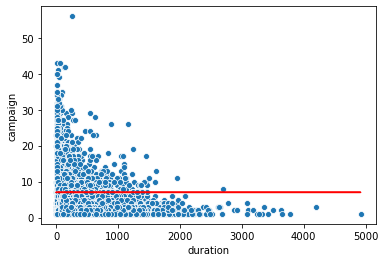

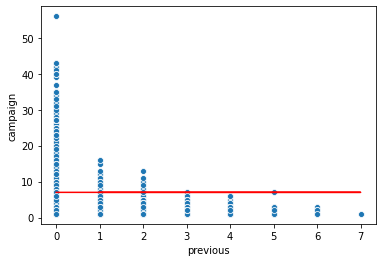

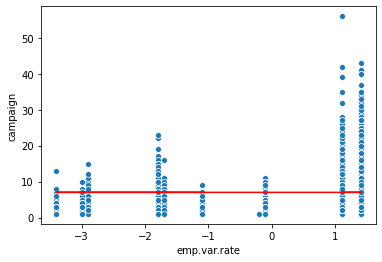

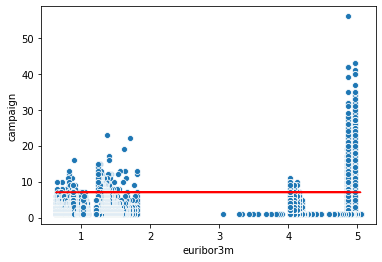

In [18]:
y_line = np.array([7]*df.shape[0])
for i, col in enumerate(col_to_check):
    plt.figure(i)
    sns.scatterplot(x=col, y="campaign", data= df)
    plt.plot(df[col], y_line, color = "r")

In [19]:
df.groupby([df["duration"]>2000])["y"].mean()

duration
False    0.111895
True     0.633333
Name: y, dtype: float64

In [20]:
df[df["duration"]>2000]["y"].value_counts()

1    38
0    22
Name: y, dtype: int64

In [21]:
df[(df["duration"]>2000)&(df["campaign_7"]==1)]["y"].value_counts()

1    37
0    22
Name: y, dtype: int64

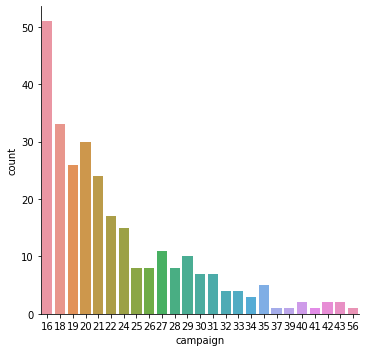

In [22]:
df2 = df.set_index("campaign").loc[zero_campaigns, :].reset_index()
sns.catplot(x="campaign", kind="count", data=df2);

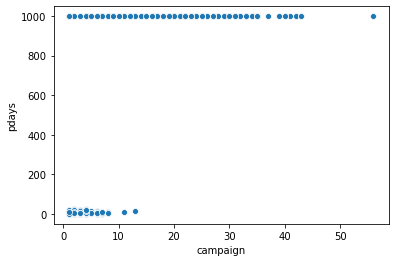

In [23]:
sns.scatterplot(y="pdays", x="campaign", data = df);

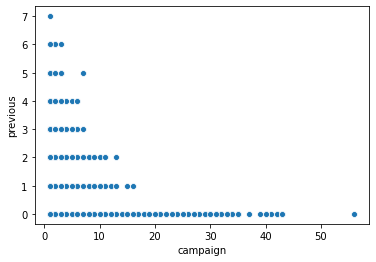

In [24]:
sns.scatterplot(y="previous", x="campaign", data = df);

In [25]:
df[df["campaign"]<=7][cont_variables].corr()["pdays"]
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)

age              -0.035347
duration         -0.046574
campaign          0.047824
pdays             1.000000
previous         -0.587798
emp.var.rate      0.270275
cons.price.idx    0.075916
cons.conf.idx    -0.092688
euribor3m         0.296914
nr.employed       0.373349
y                -0.327575
campaign_7             NaN
Name: pdays, dtype: float64

## ML for finding an answer

In [26]:
# filling the missing values

text_cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
cat_values_dict = {}
for col in text_cat_columns:
    print("Column: %s, Number of unique values: %d"% (col, df[col].nunique()))
    cat_values_dict[col] = list(set(df[col].unique())-set(["unknown"]))

for col in text_cat_columns:
    n_missing = df[df[col]=="unknown"].shape[0]
    missing_index = df[df[col]=="unknown"].index
    print(col, n_missing)
    fill_vallues = cat_values_dict[col]*n_missing
    random.shuffle(fill_vallues)
    df.loc[missing_index, col]= fill_vallues[:n_missing]

Column: job, Number of unique values: 12
Column: marital, Number of unique values: 4
Column: education, Number of unique values: 8
Column: default, Number of unique values: 3
Column: housing, Number of unique values: 3
Column: loan, Number of unique values: 3
Column: contact, Number of unique values: 2
job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0


In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'campaign_7'],
      dtype='object')

In [28]:
df2 = df.drop(["campaign", "y"], axis=1).copy()

In [29]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'campaign_7'],
      dtype='object')

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
df2["campaign_7"].value_counts()

1    39411
0     1777
Name: campaign_7, dtype: int64

In [32]:
df2 =pd.get_dummies(df2)
X = df2.drop("campaign_7", axis=1)
y = df2["campaign_7"]

In [33]:
# stratified spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, stratify =y, random_state =123)
X_train.shape, X_test.shape

((32950, 56), (8238, 56))

In [34]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

splits = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=123)

In [35]:
def results(my_cv_results):
    print("Best Parameters: {}\n".format(my_cv_results.best_params_))
    means = my_cv_results.cv_results_["mean_test_score"]
    stds = my_cv_results.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, my_cv_results.cv_results_["params"]):
        print("{} +/- {} for {}".format(round(mean, 3), round(std*2, 3), params))

In [36]:
%%time
rf = RandomForestClassifier()
parameters = {"n_estimators" : [5, 50, 250],
             "max_depth": [2,4,8,16, None]}

cv = GridSearchCV(rf, parameters, cv=splits) #by defult refit =True, so the best model is automatically retrained on the whole data
cv.fit(X_train, y_train)

results(cv)
rf_best = cv.best_estimator_

Best Parameters: {'max_depth': 16, 'n_estimators': 50}

0.957 +/- 0.0 for {'max_depth': 2, 'n_estimators': 5}
0.957 +/- 0.0 for {'max_depth': 2, 'n_estimators': 50}
0.957 +/- 0.0 for {'max_depth': 2, 'n_estimators': 250}
0.957 +/- 0.0 for {'max_depth': 4, 'n_estimators': 5}
0.957 +/- 0.0 for {'max_depth': 4, 'n_estimators': 50}
0.957 +/- 0.0 for {'max_depth': 4, 'n_estimators': 250}
0.958 +/- 0.001 for {'max_depth': 8, 'n_estimators': 5}
0.958 +/- 0.0 for {'max_depth': 8, 'n_estimators': 50}
0.958 +/- 0.001 for {'max_depth': 8, 'n_estimators': 250}
0.955 +/- 0.001 for {'max_depth': 16, 'n_estimators': 5}
0.958 +/- 0.001 for {'max_depth': 16, 'n_estimators': 50}
0.958 +/- 0.001 for {'max_depth': 16, 'n_estimators': 250}
0.952 +/- 0.001 for {'max_depth': None, 'n_estimators': 5}
0.957 +/- 0.001 for {'max_depth': None, 'n_estimators': 50}
0.957 +/- 0.001 for {'max_depth': None, 'n_estimators': 250}
CPU times: user 2min 40s, sys: 5.64 s, total: 2min 46s
Wall time: 3min 49s


In [37]:
%%time
gb = GradientBoostingClassifier()
parameters = {"n_estimators" : [5, 50, 250],
             "max_depth": [1, 3, 5, 7],
             "learning_rate": [0.01, 0.1, 1, 10]}

cv = GridSearchCV(gb, parameters, cv=splits)
cv.fit(X_train, y_train)

results(cv)
gb_best = cv.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.958 +/- 0.001 for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.958 +/- 0.001 for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 5}
0.957 +/- 0.0 for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
0.958 +/- 0.002 for {'learning_rate': 0.01, 'max_depth': 7, 'n

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
model_names = ["RF", "GB"]
results_df = pd.DataFrame(index= model_names, columns = ["precision", "recall", "f1_score"])
models = [rf_best, gb_best]

for i, model in enumerate(models):
    y_pred = models[i].predict(X_test)
    results_df.loc[model_names[i], "precision"] = precision_score(y_test, y_pred, average = "macro")
    results_df.loc[model_names[i], "recall"] = recall_score(y_test, y_pred, average = "macro")
    results_df.loc[model_names[i], "f1_score"] = f1_score(y_test, y_pred, average = "macro")
results_df

,precision,recall,f1_score
RF,0.80563,0.538485,0.559716
GB,0.810641,0.548154,0.575267


In [40]:
feature_importances = pd.DataFrame(rf_best.feature_importances_, 
                                   index = df2.drop('campaign_7',axis=1).columns, 
                                   columns=['importance_RF'])

feature_importances["importance_GB"] = gb_best.feature_importances_
feature_importances[feature_importances["importance_GB"]!=0]

,importance_RF,importance_GB
age,0.124090,0.012916
duration,0.307571,0.559268
emp.var.rate,0.008669,0.003404
cons.price.idx,0.014092,0.011469
cons.conf.idx,0.009878,0.015280
euribor3m,0.084223,0.276710
nr.employed,0.011689,0.004507
job_admin.,0.015157,0.001006
job_blue-collar,0.014042,0.000146
job_housemaid,0.005542,0.001337


In [41]:
feature_importances.sort_values("importance_GB", ascending=False)

,importance_RF,importance_GB
duration,0.307571,0.559268
euribor3m,0.084223,0.276710
contact_telephone,0.010416,0.024662
contact_cellular,0.008915,0.024399
month_jul,0.005408,0.019580
cons.conf.idx,0.009878,0.015280
day_of_week_fri,0.014988,0.015201
age,0.124090,0.012916
cons.price.idx,0.014092,0.011469
month_may,0.003269,0.010066


In [49]:
y_pred = gb_best.predict(X_test)
print("Number of predicted y=1 in GB:", sum(y_pred==1))
print("Number of predicted y=0 in GB:", sum(y_pred==0))

Number of predicted y=1 in GB: 8185
Number of predicted y=0 in GB: 53


In [50]:
y_pred = rf_best.predict(X_test)
print("Number of predicted y=1 in GB:", sum(y_pred==1))
print("Number of predicted y=0 in GB:", sum(y_pred==0))

Number of predicted y=1 in GB: 8195
Number of predicted y=0 in GB: 43


In [51]:
print("True number of y=1:", sum(y_test==1))
print("True number of y=0:", sum(y_test==0))

True number of y=1: 7883
True number of y=0: 355


## Conclusion:

The performance of both models is not very good, but we can check the proposed most important features 
As it comes from both models, euribor3m and druration have the highest influence on whether it will be 7 or more contacts to the clients 

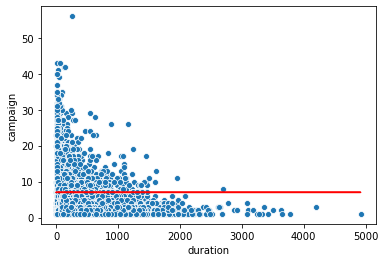

In [55]:
sns.scatterplot(x="duration", y="campaign", data = df)
y_line = np.array([7]*df.shape[0])
plt.plot(df["duration"], y_line, color = "r");

From the figure above it is clearly seen that if ast contact duration is more than 2000 seconds, less than 7 contacts were maid within a certain campaign and a certain client

In [58]:
df[(df["campaign"]<=7) & (df["duration"]>=2000)]["y"].value_counts()

1    37
0    22
Name: y, dtype: int64

In [59]:
df[(df["campaign"]>7) & (df["duration"]<2000)]["y"].value_counts()

0    1704
1      72
Name: y, dtype: int64

In [61]:
df[df["duration"]>=2000]["y"].value_counts()

1    38
0    22
Name: y, dtype: int64

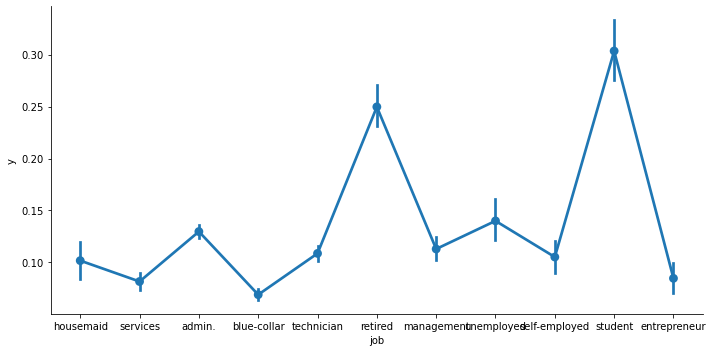

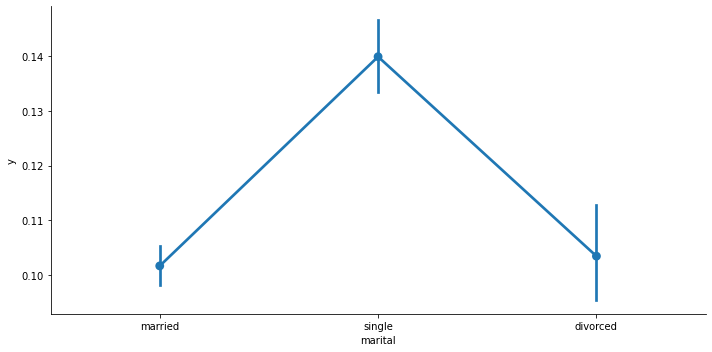

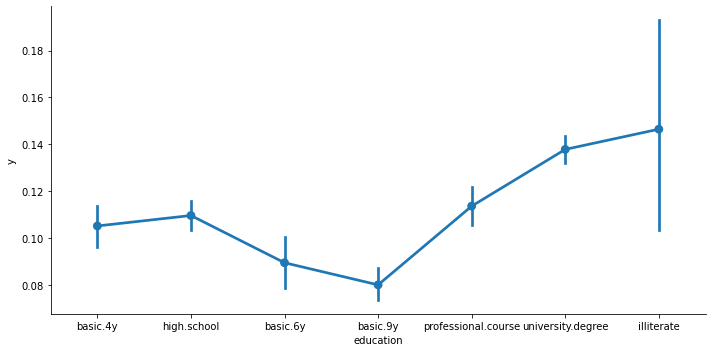

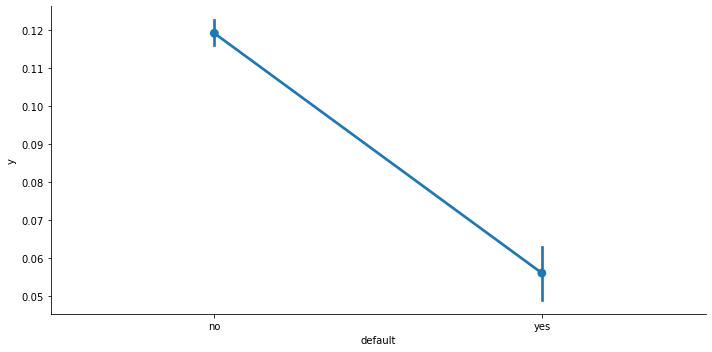

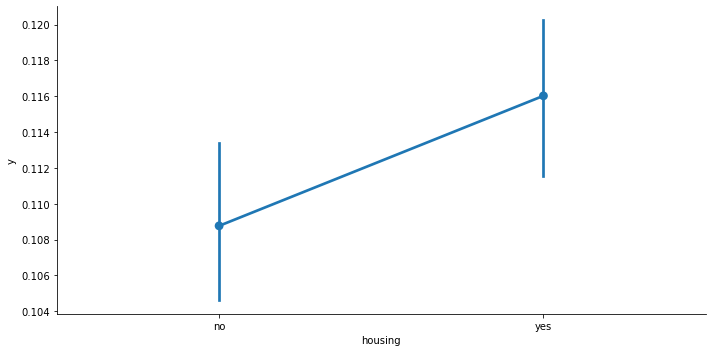

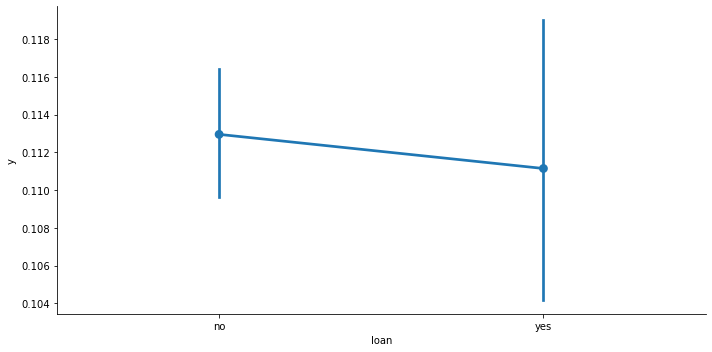

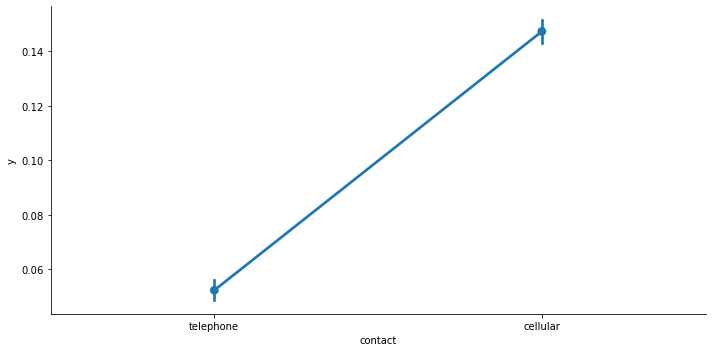

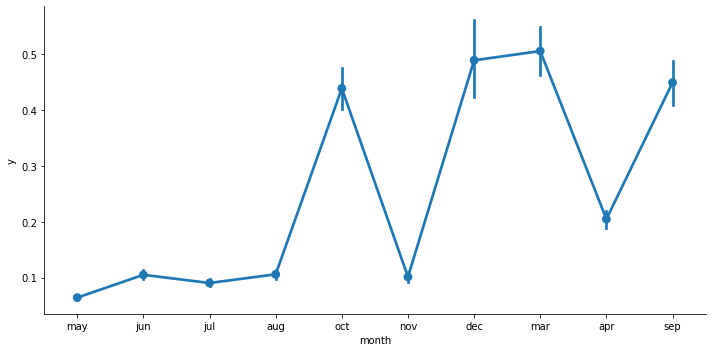

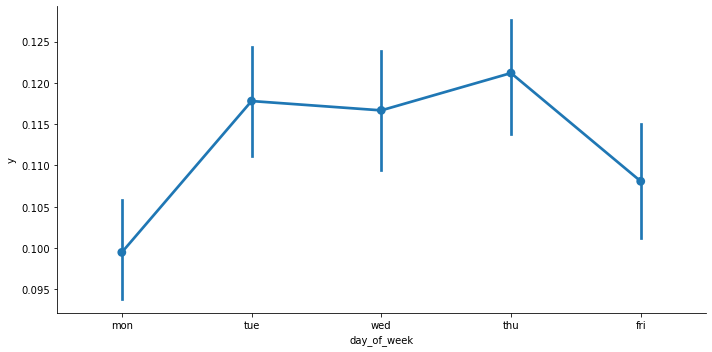

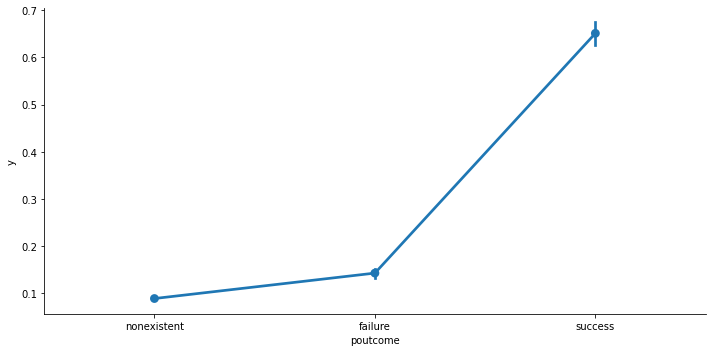

In [70]:
cat_features = [col for col in df.columns if df[col].dtype=="object"]
df_2000 = df[df["duration"]>=2000]

n_bins =40
for col in cat_features:
    sns.catplot(x=col, y="y", data =df, kind= "point", aspect =2);

## Final Conclusion:

It is better to contact clients less often (less than 7) and make the conservation longer (more than 30 minutes)